In [1]:
import numpy as np
import numpy.linalg as lalg
import matplotlib.pyplot as plt
import numpy.random as rand

In [2]:
q = int(input("Введите q от 1 до 3: "))
n = int(input("Введите n от 10 до 50: "))
N = int(input("Введите каким многочленом вы хотите аппроксимировать: "))

Введите q от 1 до 3: 2
Введите n от 10 до 50: 50
Введите каким многочленом вы хотите аппроксимировать: 3


In [3]:
def y_appr(t,C):
    len_C = np.size(C)
    sum = 0 
    for k in range(len_C):
        sum += np.power(t,k) * C[k]
    return sum

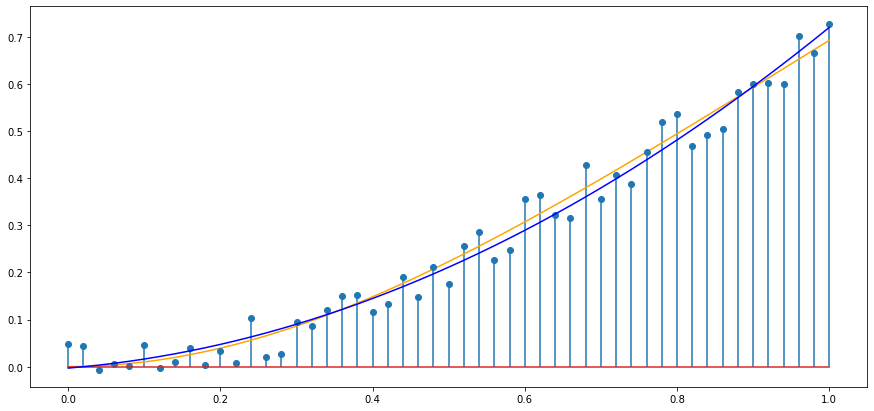

In [4]:
B = np.zeros((N, N))
A = np.zeros((N, 1))

a = 0
b = 1

x = np.linspace(a, b, n+1, endpoint = True)
y = np.log(1 + x**q)

add_rand = 0.1 * rand.sample(n+1) - 0.05 
y0 = y + add_rand

for k in range(N):
    for l in range(N):
        B[k,l] = np.sum(np.power(x,(k+l)))
    A[k] = np.sum(np.power(x,k)*y0)

c = lalg.solve(B,A)
y1 = y_appr(x,c)

eps = y-y1
epsmax = max(eps)
S = sum(np.power(eps,2))
epsm = S / (n+1)

plt.figure(figsize=(15,7))
plt.plot(x,y,color='orange')
plt.stem(x,y0, use_line_collection = True)
plt.plot(x,y1,color='blue')
plt.show()